####  Solução numérica 

Para U < 0 :

\begin{equation}
C_{j+1}^{n+1}*(\alpha - \beta) + C_{j}^{n+1}* (1- \alpha +2*\beta) + C_{j-1}^{n+1} *(-\beta) = C_{j}^{n} 
\end{equation}

Para U > 0 :

\begin{equation}
C_{j+1}^{n+1}*(- \beta) + C_{j}^{n+1}* (1 + \alpha +2*\beta) + C_{j-1}^{n+1} *(-\alpha -\beta) = C_{j}^{n} 
\end{equation}

Com as seguintes condições iniciais e de contorno:

\begin{equation}
    C(x,t=0) = C_{0}
\end{equation}

Condição de contorno:

\begin{equation}
c(0, t)=\left\{\begin{array}{lc}c_{0} & 0 < t < t_{0} \\
0 & t>t_{o}\end{array}\right.
\end{equation}

\begin{equation}
\frac{\partial c}{\partial x}(\infty, t)=0
\end{equation}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mpl_toolkits.mplot3d
import scipy.sparse as sp
import scipy.sparse.linalg 
import scipy.linalg as la
from numpy import zeros

In [22]:
#===============================================================
# Defining parameters
#===============================================================

tmin = 0.
tmax = 10.0 # Tempo total de análise
dt = 0.01 # Passo no tempo
nt = int(tmax/dt) # Número de iterações no tempo
t = np.arange(tmin, tmax, dt) # vetor tempo para plotar

xmin = 0.
xmax = 1.0 # Distância total percorrida
dx = 0.1 # Passo no espaço
nx = int(xmax/dx) # Número de pontos em x, considera x=0 e x=xmax
x = np.arange(xmin, xmax, dx)

c = 0.5 # Celeridade do fluxo
D = 0.1 # Difusão

#===============================================================
# Stability check
#===============================================================

courant = c*dt/dx                 # Número de Courant <= 1
if courant <= 1:
  print('Courant: OK')
else:
  print('Courant: Corrigir')

pe = c * dx /D                    # Núemro de pèclet <= 2
if pe <= 2:
  print('Pèclet: OK')
else:
  print('Pèclet: Corrigir')

neumann = D *dt/dx**2             # Von Neumann <= 1/2
if neumann <= 0.5:
  print('Neumann: OK')
else:
  print('Neumann: Corrigir')


Courant: OK
Pèclet: OK
Neumann: OK


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

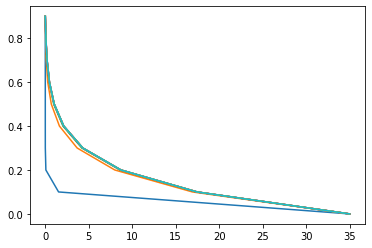

In [26]:
#===============================================================
# Definir matriz tridiagonal de solução (A)
#===============================================================

# Diagonais inferior, central e superior (k1,k2,k3)

from tkinter import N


alfa  = c*dt/dx                                             # Stability condition - Udt/dx
beta  = D*dt/(dx**2)                                        # Stability condition - Ddt/dx^2

k1    =  alfa - beta                                      # Diagonal inferior 
k2    = 1 - alfa + 2*beta                                   # Diagonal meio
k3    = - beta                                             # Diagonal superior

A = (np.eye(nx, k=-1)*k1 + np.eye(nx)*k2 + np.eye(nx, k=1)*k3) # Matriz de solução (A)
# A = (sp.eye(nx, k=-1)*k1 + sp.eye(nx)*k2 + sp.eye(nx, k=1)*k3) # Matriz de solução (A)
A[0,0] = 1
A[0,1] = 0
A[nx-1,nx-1] = 1
A[nx-1,nx-2] = 0

#===============================================================
# Definir vertor resposta (b)
#===============================================================

b = np.zeros(nx)

# Aplicar condição inicial 

ci = 0 # c(x.t=0) = 0

def CI(x):                                                 # define a condição inicial
    if xmin <= x <= xmax:
        return ci          

for i in range(nx):                                         # monta a condição inicial
   xi = i*dx
   b[i] = CI(xi)

# Aplicar as condições de contorno 

b[0] = 35.0 # c(x=1, t) = 35
b[nx-1] =  0 # c(x=xmax, t) = 0 

#===============================================================
# Iterações no tempo e no espaço
#===============================================================
nt_resposta = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])
resposta = zeros((len(nt_resposta),nx), float)
p = zeros((nt,nx),float)
cont = 0

for n in range(nt):
    u = la.solve(A, b)
    if cont == 0:
        p[n,:] = u
    if cont == 100:
        p[n,:] = u
    if cont == 200:
        p[n,:] = u
    if cont == 300:
        p[n,:] = u
    if cont == 400:
        p[n,:] = u
    if cont == 500:
        p[n,:] = u
    if cont == 600:
        p[n,:] = u
    if cont == 700:
        p[n,:] = u
    if cont == 800:
        p[n,:] = u
    if cont == 900:
        p[n,:] = u

    b = u    
    cont +=1

for i in range(len(nt_resposta)):

    resposta[i,:] = p[nt_resposta[i],:]


for i in range(len(x)):
    plt.plot(resposta[i,:], x )
